In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
nmi = [
    'dtag',
    'ptb',
    'npl',
    'roa',
    'nist',
    'usno',
    'vsl',
    'estc',
    'op'
]

In [26]:
def read_circular_t(filename):
    d = pd.read_csv(
        filename, 
        sep=r'\s+',
        skiprows=2,
        skipfooter=1,
        usecols=[0, 1],
        names=['mjd', 'utcdiff'],
        na_values=['-'],
        engine='python'
    )
    return d.dropna()

In [27]:
def read_circular_t_files():
    frames = dict()
    for k in nmi:
        url = 'ftp://ftp2.bipm.org/pub/tai/publication/utclab/utc-{}'.format(k)
        frames[k] = read_circular_t(url)
    return pd.concat(frames).reset_index(level=0).rename(columns={'level_0': 'k'})

In [28]:
d = read_circular_t_files()

In [29]:
def plot(d):
    plt.style.use('ggplot')
    
    f = plt.figure(figsize=(16, 8))
    ax = f.subplots()
    for name, g in d.groupby('k'):
        ax.plot(g.mjd, g.utcdiff, label=name, alpha=.8)

    ax.legend(loc='upper right')
    ax.set_title("UTC - UTC(k)")
    ax.set_ylabel("nanoseconds")
    ax.set_xlabel('mjd')

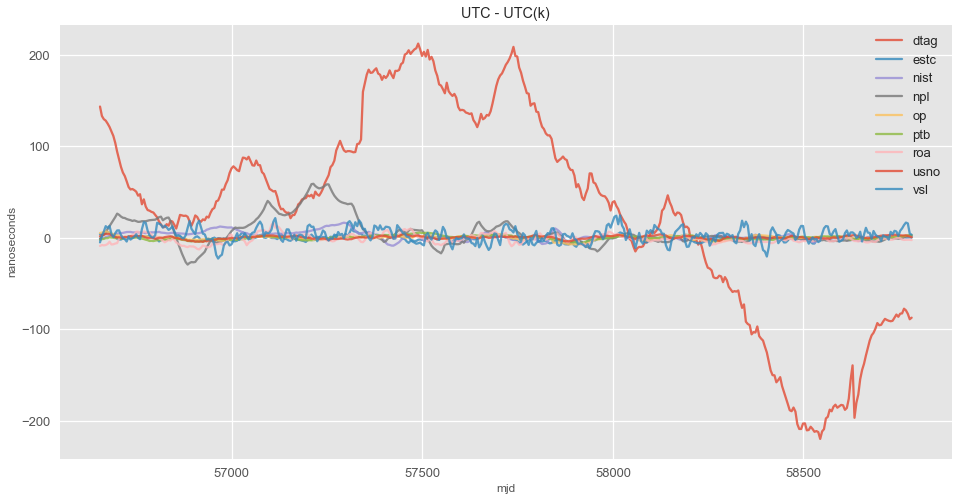

In [30]:
plot(d.query("mjd > 56650"))

In [24]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']
